Preparing library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

import warnings
%matplotlib inline
import random
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('customer_segmentation.csv')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.value_counts()

ID     Year_Birth  Education   Marital_Status  Income   Kidhome  Teenhome  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0      1985        Graduation  Married         70951.0  0        0         04-05-2013   66       239       10         554              254              87                54            1                  3                4                    9                  1                  0             0             0             0             0             0         3              11         0           1
7373   1952        PhD         Divorced        46610.0  0        2         29-10-2012   8        96        12         96               33               22                43            6                  4   

Data Cleaning

In [ ]:
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Feature Engineering

In [ ]:
# Transofrming Age data into categorical data
df['Age'] = 2025 - df['Year_Birth'] # age calculation
df['Age'].value_counts()

Age
49     89
54     86
50     83
53     78
47     76
55     75
60     74
52     72
56     70
51     69
69     55
46     53
67     52
48     52
73     52
57     51
59     50
66     50
71     49
65     49
70     48
43     44
62     44
63     44
58     44
74     42
42     41
39     41
68     41
61     41
45     39
44     38
41     38
64     35
72     35
40     32
76     30
36     29
37     29
75     29
38     27
77     21
35     18
79     16
78     16
34     15
33     13
80      8
81      7
82      6
30      5
32      5
31      3
29      2
126     1
84      1
132     1
125     1
85      1
Name: count, dtype: int64

In [ ]:
# Total spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpent'] = df[spending_cols].sum(axis=1)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,71,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,60,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,41,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,44,422
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,0,3,11,0,58,716
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,0,0,0,3,11,0,54,590
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,0,3,11,0,40,169
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,0,3,11,1,51,46
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,0,0,0,3,11,0,75,49


In [ ]:
# Total Purchases
purchases_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpent,TotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,68,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,71,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,60,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,41,53,8
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,44,422,19
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,3,11,0,58,716,22
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,0,0,3,11,0,54,590,21
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,3,11,0,40,169,10
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,3,11,1,51,46,6
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,0,0,3,11,0,75,49,2


In [ ]:
# Household Size
df['HouseholdSize'] = df['Kidhome'] + df['Teenhome'] + 2
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpent,TotalPurchases,HouseholdSize
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,68,1617,25,2
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,71,27,6,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,60,776,21,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,41,53,8,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,44,422,19,3
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,0,3,11,0,58,716,22,3
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,0,3,11,0,54,590,21,3
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,3,11,0,40,169,10,3
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,3,11,1,51,46,6,3
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,0,3,11,0,75,49,2,4


In [ ]:
# Campaign response
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['CampaignResponse'] = df[campaign_cols].gt(0).astype(int).sum(axis=1) # Manipulate boolean to integer and sum
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpent,TotalPurchases,HouseholdSize,CampaignResponse
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,68,1617,25,2,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,71,27,6,4,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,60,776,21,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,41,53,8,3,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,44,422,19,3,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,3,11,0,58,716,22,3,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,3,11,0,54,590,21,3,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,3,11,0,40,169,10,3,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,3,11,1,51,46,6,3,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,3,11,0,75,49,2,4,1


In [ ]:
# Customer Seniority
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_Seniority'] = (pd.to_datetime('2025-01-01') - df['Dt_Customer']).dt.days
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpent,TotalPurchases,HouseholdSize,CampaignResponse,Customer_Seniority
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,1617,25,2,1,4502
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,27,6,4,0,3952
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,776,21,2,0,4151
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,53,8,3,0,3978
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,422,19,3,0,4000
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,3,11,0,58,716,22,3,0,4132
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,3,11,0,54,590,21,3,0,4432
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,3,11,0,40,169,10,3,0,4256
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,3,11,1,51,46,6,3,1,4227
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,3,11,0,75,49,2,4,1,3947


Data Visualisation

Relative Distribution of Features


<Figure size 1000x800 with 0 Axes>

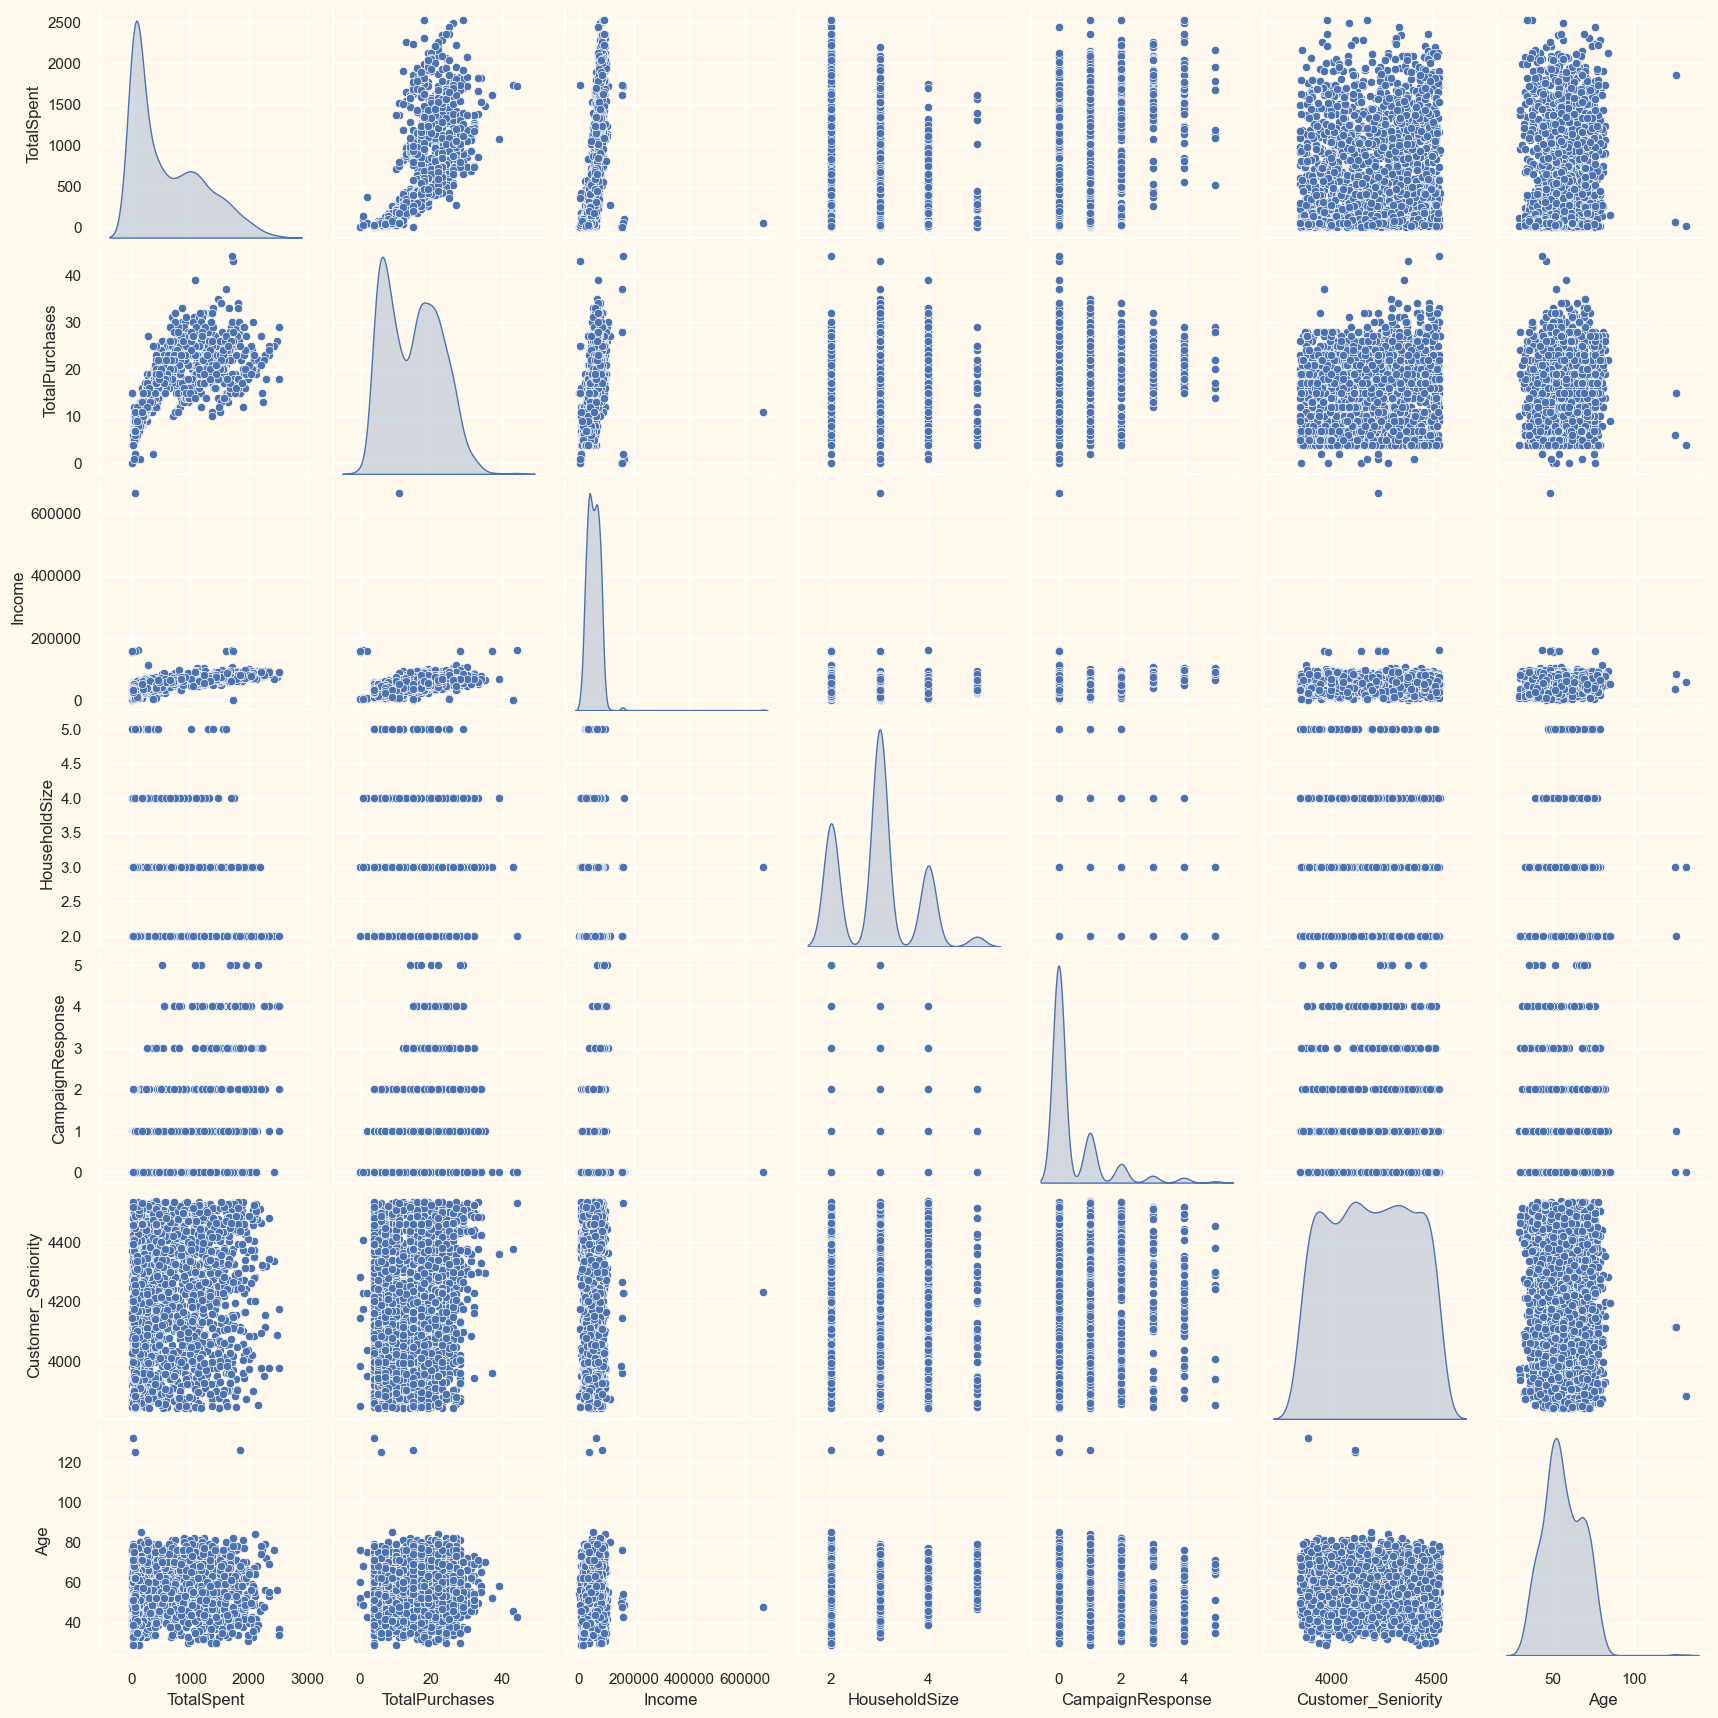

In [ ]:
"""Plotting the distribution of key features"""

# setting up color preferences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(pallet)

# plotting following features
To_plot = ['TotalSpent', 'TotalPurchases',  'Income', 'HouseholdSize', 'CampaignResponse', 'Customer_Seniority', 'Age']
print("Relative Distribution of Features")
plt.figure(figsize=(10,8))
sns.pairplot(df[To_plot], palette=cmap, diag_kind='kde', height=2.5)
plt.show()

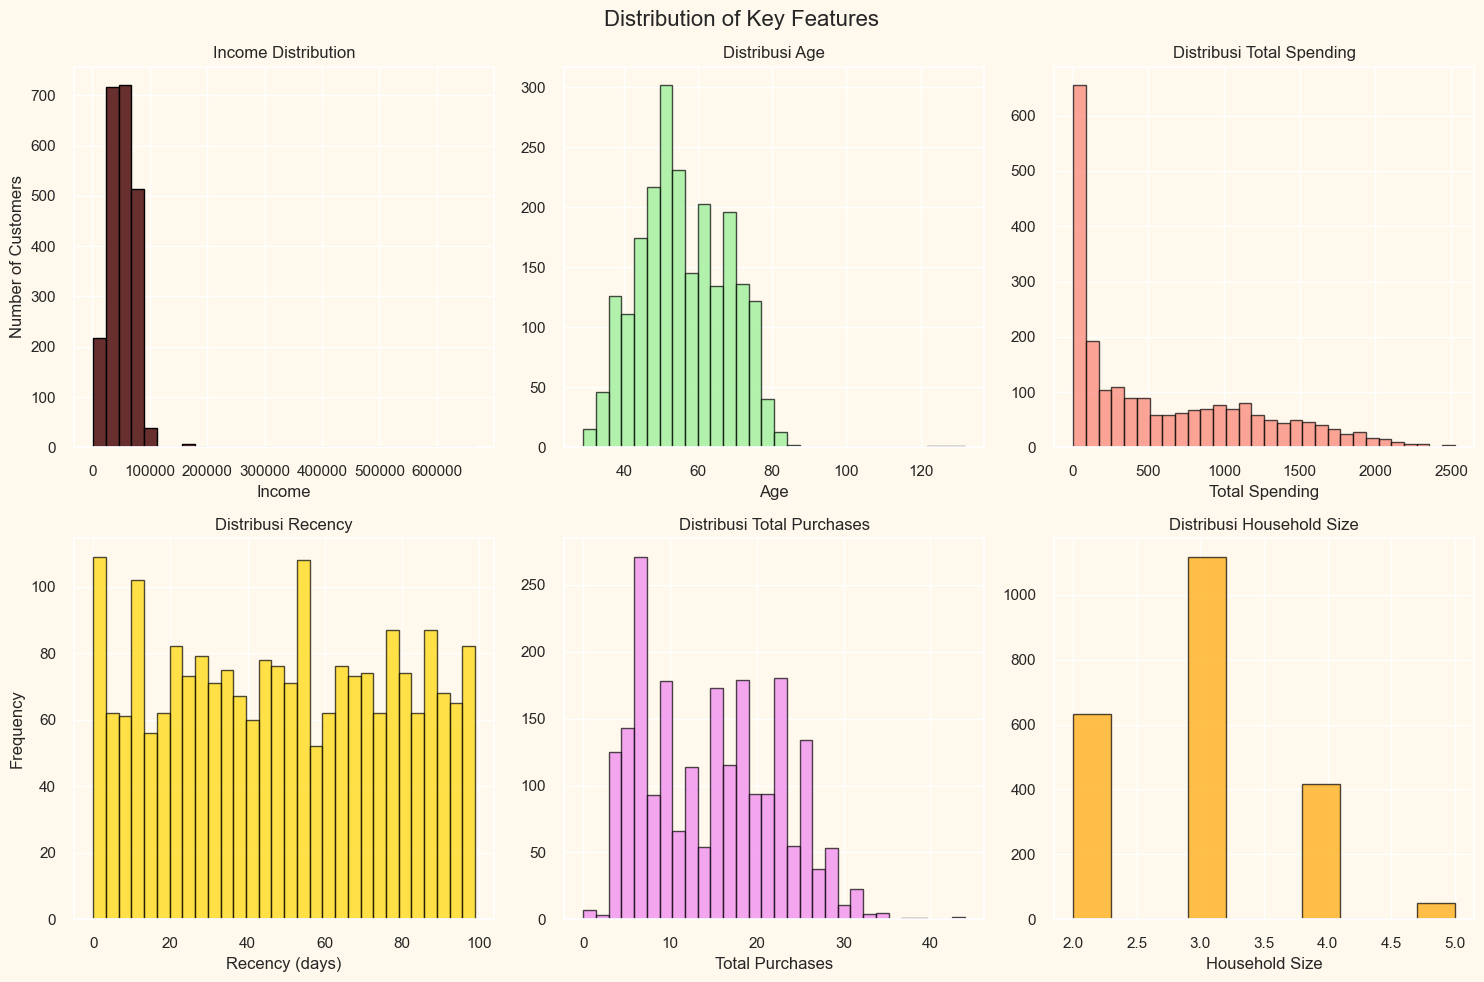

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Distribution of Key Features', fontsize=16)

# Income
axes[0,0].hist(df['Income'].dropna(), bins=30, color=pallet[0], edgecolor='black')
axes[0,0].set_title('Income Distribution')
axes[0,0].set_xlabel('Income')
axes[0,0].set_ylabel('Number of Customers')

# Age
axes[0,1].hist(df['Age'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribusi Age')
axes[0,1].set_xlabel('Age')

# Total Spending
axes[0,2].hist(df['TotalSpent'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
axes[0,2].set_title('Distribusi Total Spending')
axes[0,2].set_xlabel('Total Spending')

# Recency
axes[1,0].hist(df['Recency'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[1,0].set_title('Distribusi Recency')
axes[1,0].set_xlabel('Recency (days)')
axes[1,0].set_ylabel('Frequency')

# Total Purchases
axes[1,1].hist(df['TotalPurchases'], bins=30, alpha=0.7, color='violet', edgecolor='black')
axes[1,1].set_title('Distribusi Total Purchases')
axes[1,1].set_xlabel('Total Purchases')

# Household Size
axes[1,2].hist(df['HouseholdSize'], bins=10, alpha=0.7, color='orange', edgecolor='black')
axes[1,2].set_title('Distribusi Household Size')
axes[1,2].set_xlabel('Household Size')

plt.tight_layout()
plt.show()

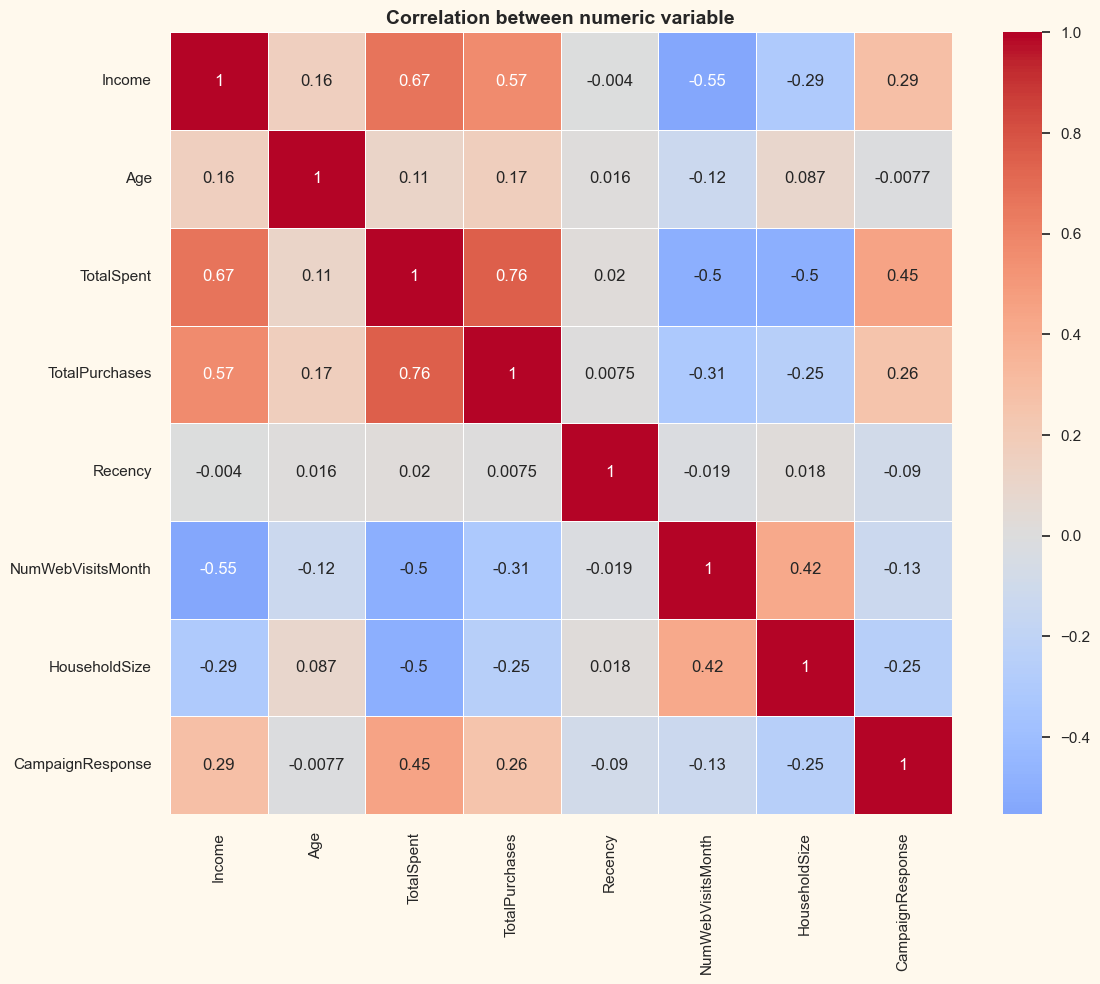

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_cols = ['Income', 'Age', 'TotalSpent', 'TotalPurchases', 'Recency', 
                   'NumWebVisitsMonth', 'HouseholdSize', 'CampaignResponse']
corr_matrix = df[correlation_cols].corr()

# create seaborn heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation between numeric variable', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

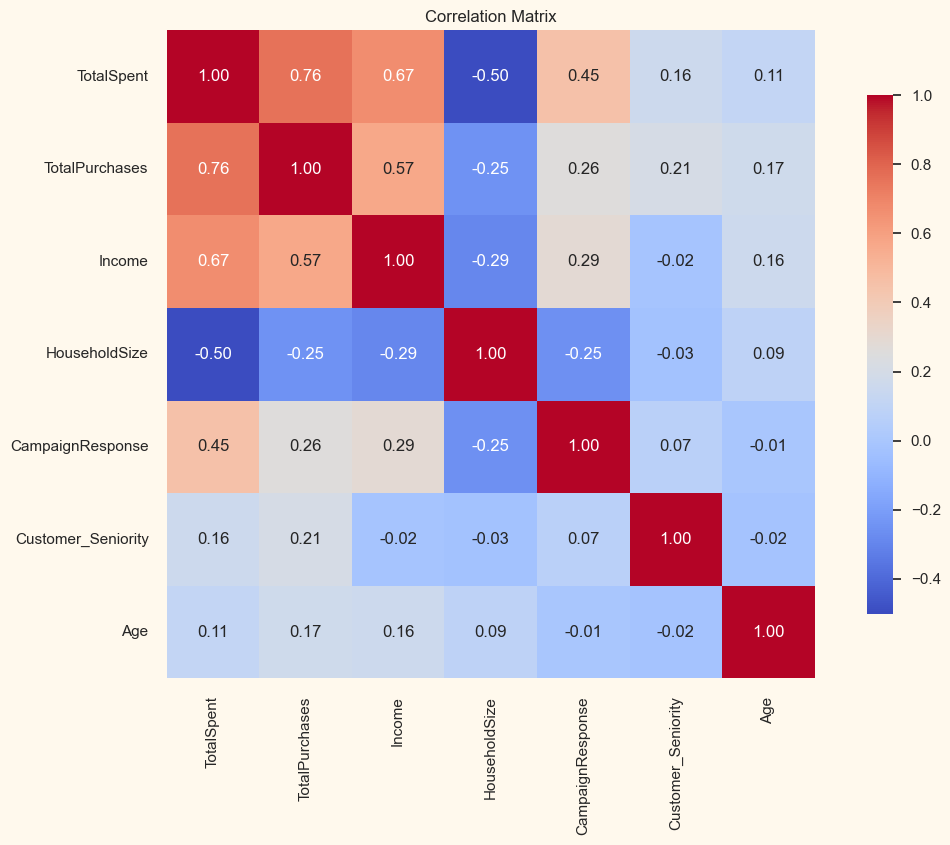

In [ ]:
# Correlation matrix
cormat = df[To_plot].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cormat, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

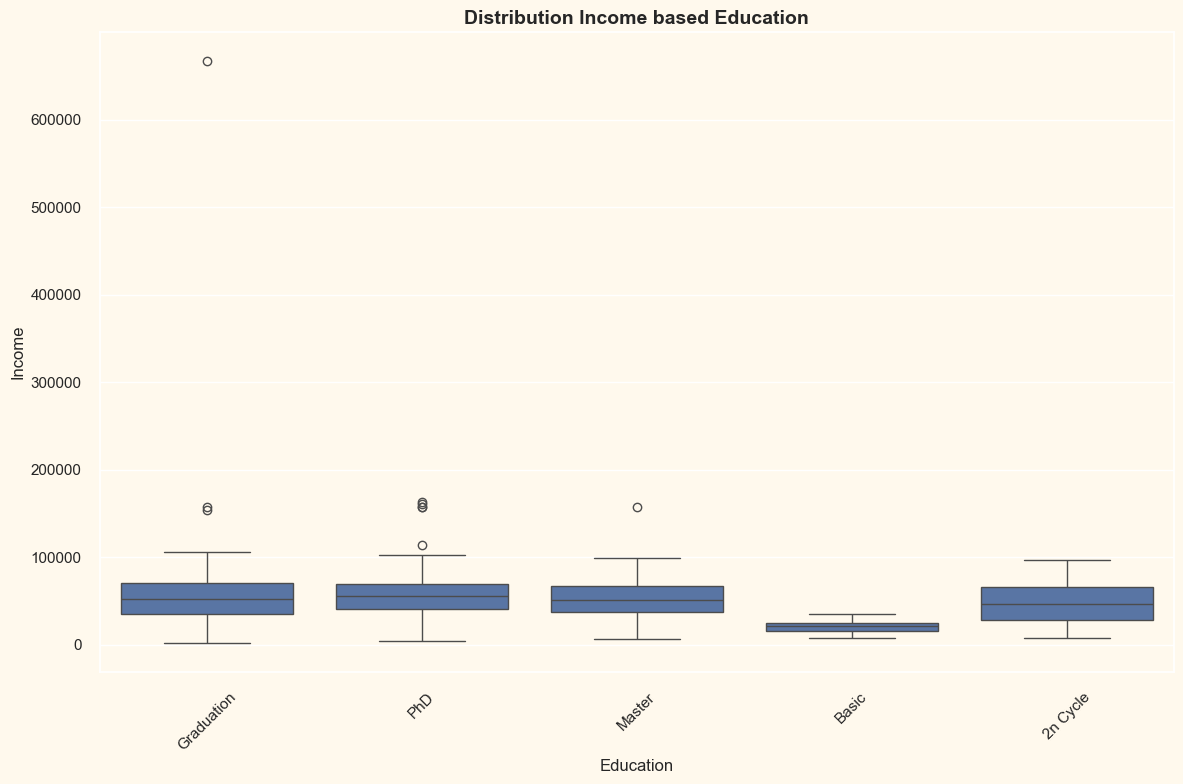

In [ ]:
# Segmentation based on Education and Income
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Education', y='Income')
plt.title('Distribution Income based Education', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

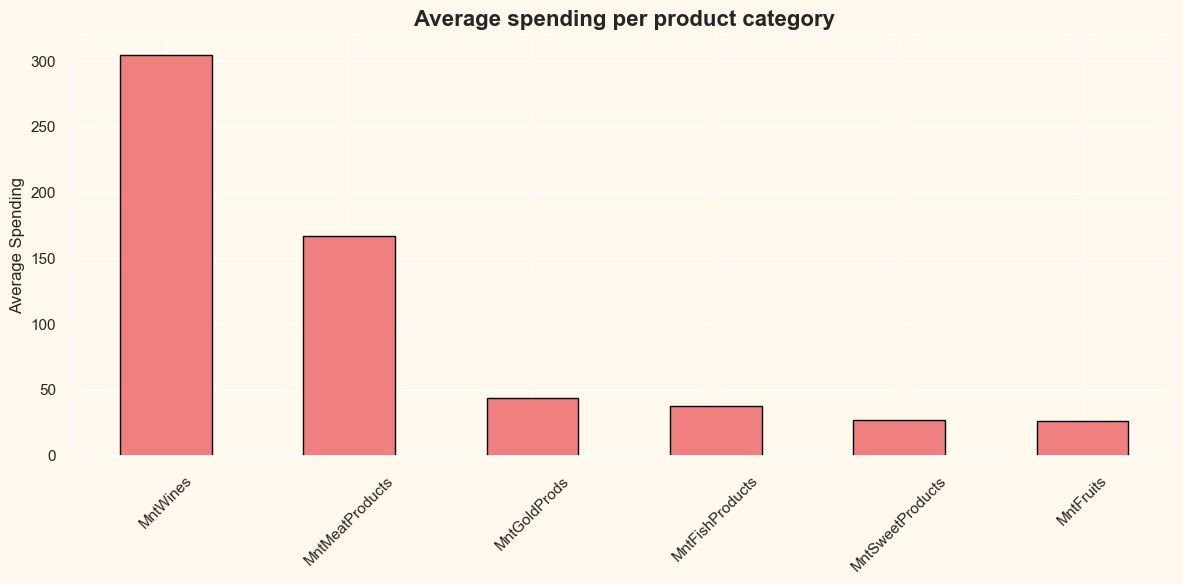

In [ ]:
#5.4 Spending by Product Category
plt.figure(figsize=(12, 6))
spending_data = df[spending_cols].mean().sort_values(ascending=False)
spending_data.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average spending per product category', fontsize=16, fontweight='bold')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

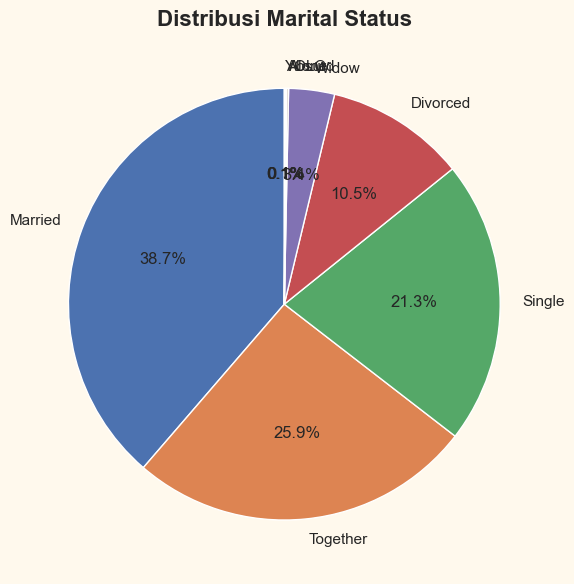

In [ ]:
# 5.5 Marital Status Distribution
plt.figure(figsize=(10, 6))
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Marital Status', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

Data Labelling

In [ ]:
# Choose variable for clustering
clustering_features = ['Income', 'TotalSpent', 'TotalPurchases', 'Recency', 
                      'NumWebVisitsMonth', 'Age', 'HouseholdSize']
# For data clustering
X = df[clustering_features].copy()

# Handle any remaining missing values
X = X.fillna(X.median())

# Standaritation data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Clustering

In [ ]:
"""targetting total of optimal cluster"""

# Elbow Method
inertia = []
k_range = range(2, 11)

# make a function
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

kmeans

,n_clusters,10
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


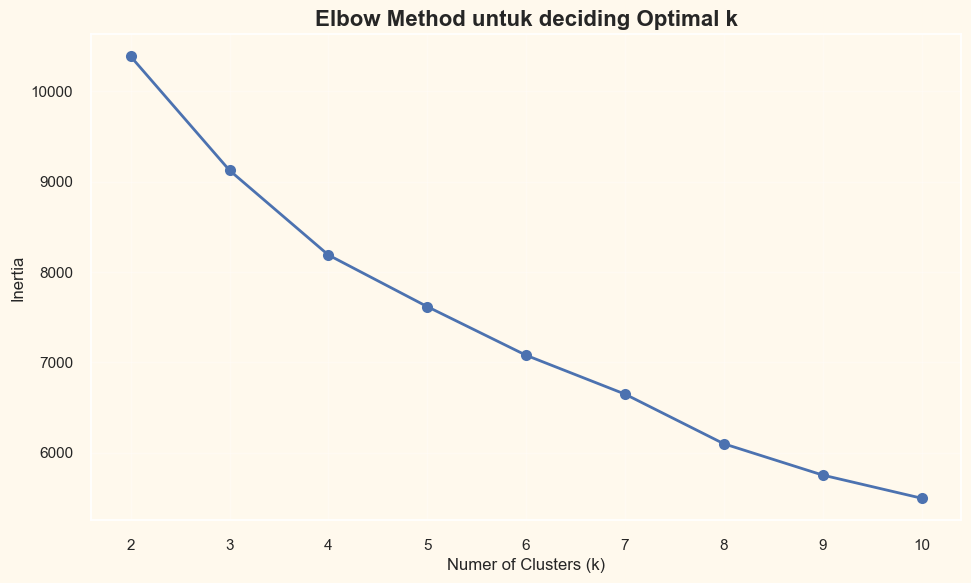

In [ ]:
# create clustering visualitation
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Numer of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk deciding Optimal k', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

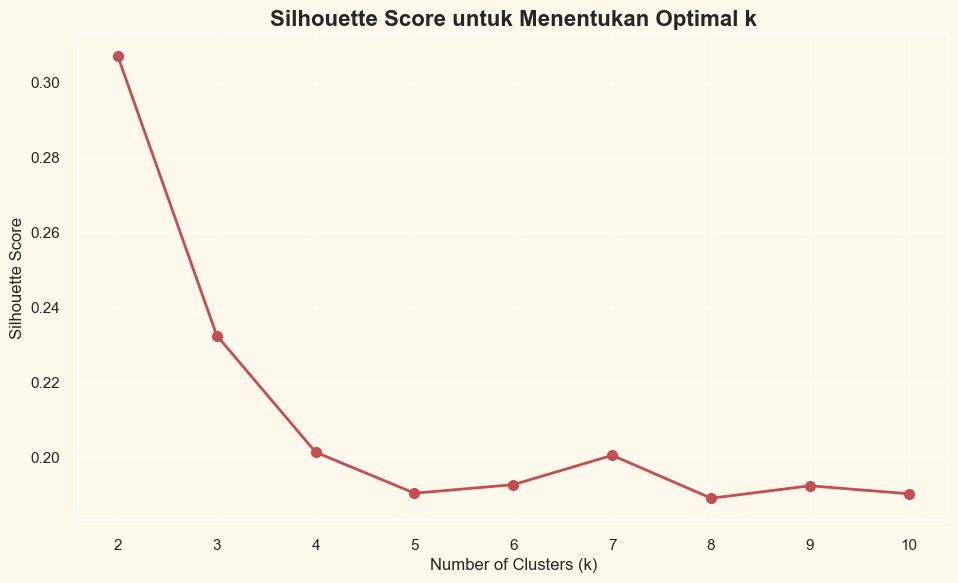

In [ ]:
# Silhouette Score
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'ro-', markersize=8, linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Optimal k', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

Clustering with K-Means

In [ ]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())

# Analysis Cluster

# profile cluster based on numeric variable
cluster_profile = df.groupby('Cluster')[clustering_features].mean()
print("\nProfil Cluster (Rata-rata):")
print(cluster_profile)

# Profil Cluster berdasarkan variabel kategorikal
categorical_features = ['Education', 'Marital_Status', 'CampaignResponse']
for feature in categorical_features:
    print(f"\nDistribusi {feature} per Cluster:")
    cross_tab = pd.crosstab(df['Cluster'], df[feature], normalize='index') * 100
    print(cross_tab.round(2))

Cluster distribution:
Cluster
0    486
1    635
2    475
3    620
Name: count, dtype: int64

Profil Cluster (Rata-rata):
               Income   TotalSpent  TotalPurchases    Recency  \
Cluster                                                         
0        79690.088477  1386.318930       19.979424  49.709877   
1        30387.217323   111.837795        7.996850  48.174803   
2        42078.953684   131.216842        9.488421  51.290526   
3        60914.741935   868.037097       22.066129  47.579032   

         NumWebVisitsMonth        Age  HouseholdSize  
Cluster                                               
0                 2.296296  56.265432       2.076132  
1                 6.844094  47.919685       2.809449  
2                 6.025263  61.747368       3.873684  
3                 5.585484  60.306452       3.061290  

Distribusi Education per Cluster:
Education  2n Cycle  Basic  Graduation  Master    PhD
Cluster                                              
0              

In [ ]:
# Creating a copy and transforming data for relating variables
ds = df.copy()

cols_del = ['Income', 'Age', 'TotalSpent', 'TotalPurchases', 'Recency', 
                'NumWebVisitsMonth', 'HouseholdSize', 'Customer_Seniority']
ds = ds[cols_del]

# Check for missing values before scaling
print("Missing values before scaling:\n", ds.isnull().sum())

# handle any missing values
ds = ds.fillna(ds.median())

# Scale the data
scaler_ds = StandardScaler()
scaled_data = scaler_ds.fit_transform(ds)
scaled_ds = pd.DataFrame(scaled_data, columns=ds.columns, index=ds.index)

# Verify scaling results
print("\nScaling verification:")
print(scaled_ds.describe().round(2))

Missing values before scaling:
 Income                0
Age                   0
TotalSpent            0
TotalPurchases        0
Recency               0
NumWebVisitsMonth     0
HouseholdSize         0
Customer_Seniority    0
dtype: int64

Scaling verification:
        Income      Age  TotalSpent  TotalPurchases  Recency  \
count  2216.00  2216.00     2216.00         2216.00  2216.00   
mean      0.00     0.00        0.00           -0.00    -0.00   
std       1.00     1.00        1.00            1.00     1.00   
min      -2.01    -2.27       -1.00           -1.94    -1.69   
25%      -0.67    -0.68       -0.89           -0.90    -0.86   
50%      -0.03    -0.10       -0.35            0.02    -0.00   
75%       0.65     0.82        0.73            0.80     0.86   
max      24.41     6.33        3.18            3.80     1.73   

       NumWebVisitsMonth  HouseholdSize  Customer_Seniority  
count            2216.00        2216.00             2216.00  
mean               -0.00          -0.00

Visualisation Cluster

Variance explained ratio: [0.37490293 0.15861262 0.13711181]

Cumulative variance explained: 0.6706273587588703

PCA Components Summary:
            PC1       PC2       PC3
count  2216.000  2216.000  2216.000
mean      0.000     0.000    -0.000
std       1.732     1.127     1.048
min      -4.912    -2.905    -3.012
25%      -1.582    -0.917    -0.723
50%      -0.306    -0.026     0.033
75%       1.481     0.869     0.776
max      10.669     3.680     5.158


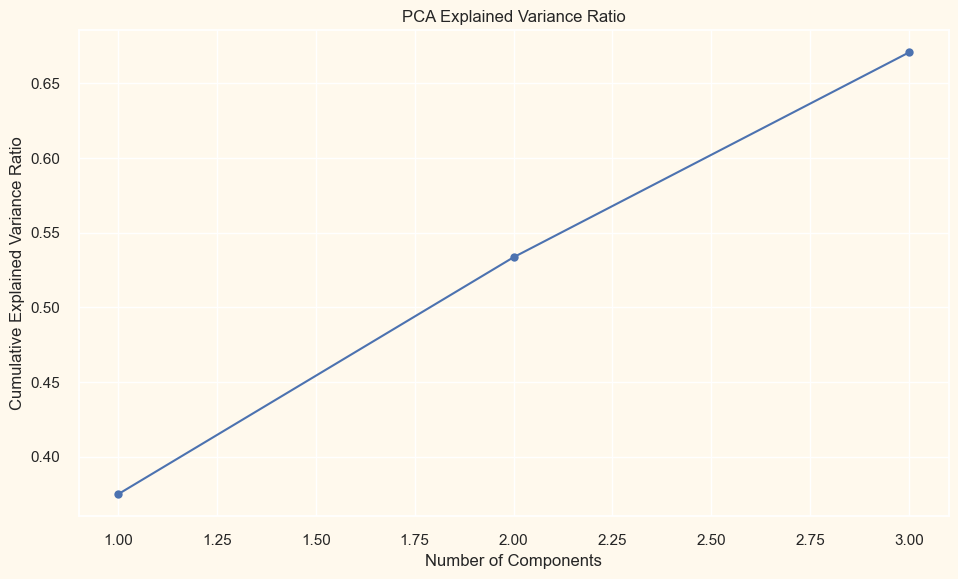

In [ ]:
# Dimensionality reduction with PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_ds)

# Create DataFrame with correct number of columns
PCA_ds = pd.DataFrame(data=pca_result,
                      columns=['PC1', 'PC2', 'PC3'],
                      index=scaled_ds.index)

# Print variance explained by each component
print(f"Variance explained ratio: {pca.explained_variance_ratio_}")
print("\nCumulative variance explained:", np.sum(pca.explained_variance_ratio_))

# Display PCA results
print("\nPCA Components Summary:")
print(PCA_ds.describe().round(3))

# Visualize PCA results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 4), np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

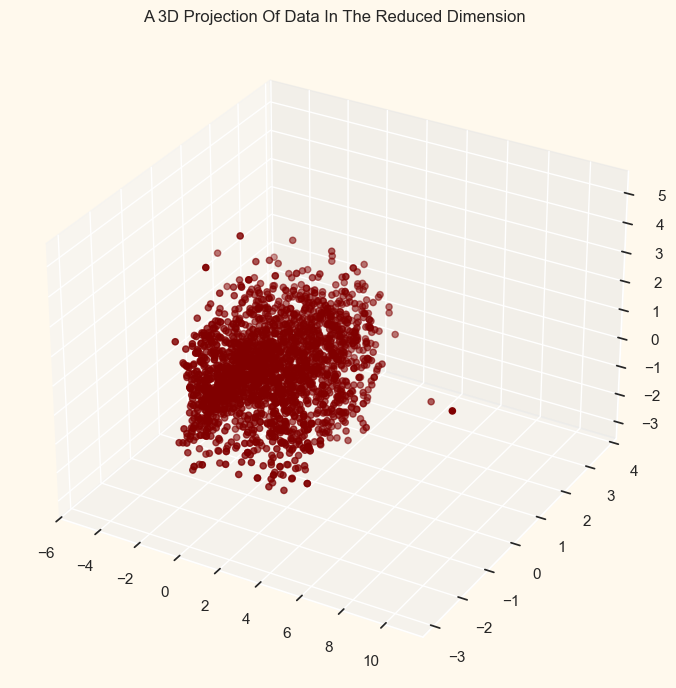

In [ ]:
# 3D Projection of data in the reduced dimension

x_ds = PCA_ds["PC1"]
y_ds = PCA_ds["PC2"]
z_ds = PCA_ds["PC3"]

# plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x_ds, y_ds, z_ds, c='maroon', marker='o')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

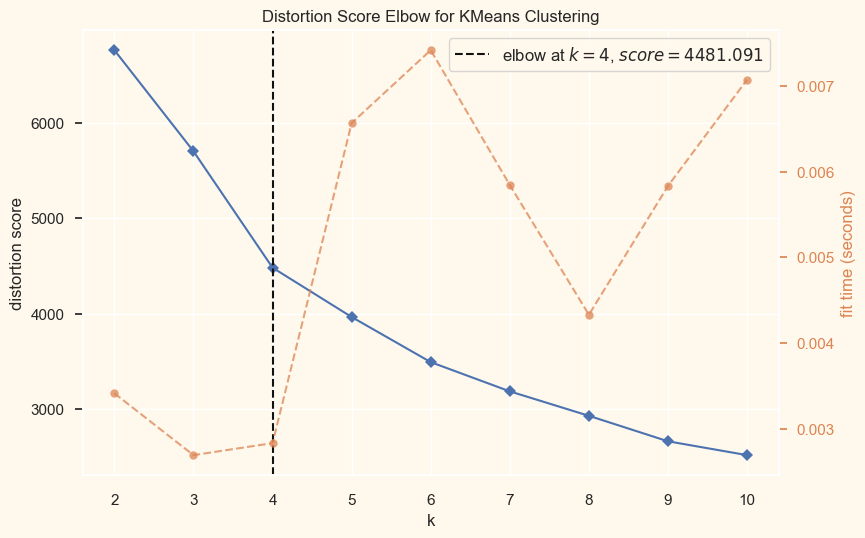

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
# initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
AC_pred = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = AC_pred

# adding the Clusters feature to the original dataframe
ds["Clusters"] = AC_pred

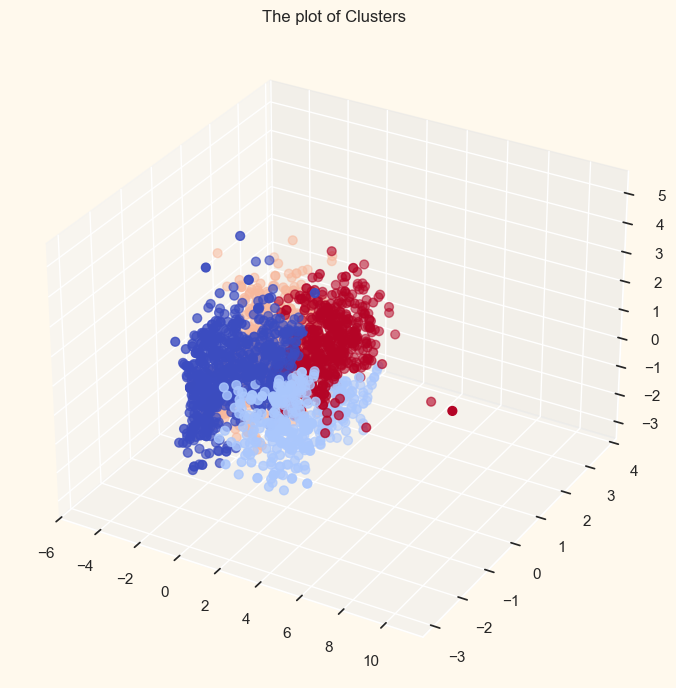

In [ ]:
# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x_ds, y_ds, z_ds, s=40, c=PCA_ds["Clusters"], marker='o', cmap='coolwarm')
ax.set_title('The plot of Clusters')
plt.show()

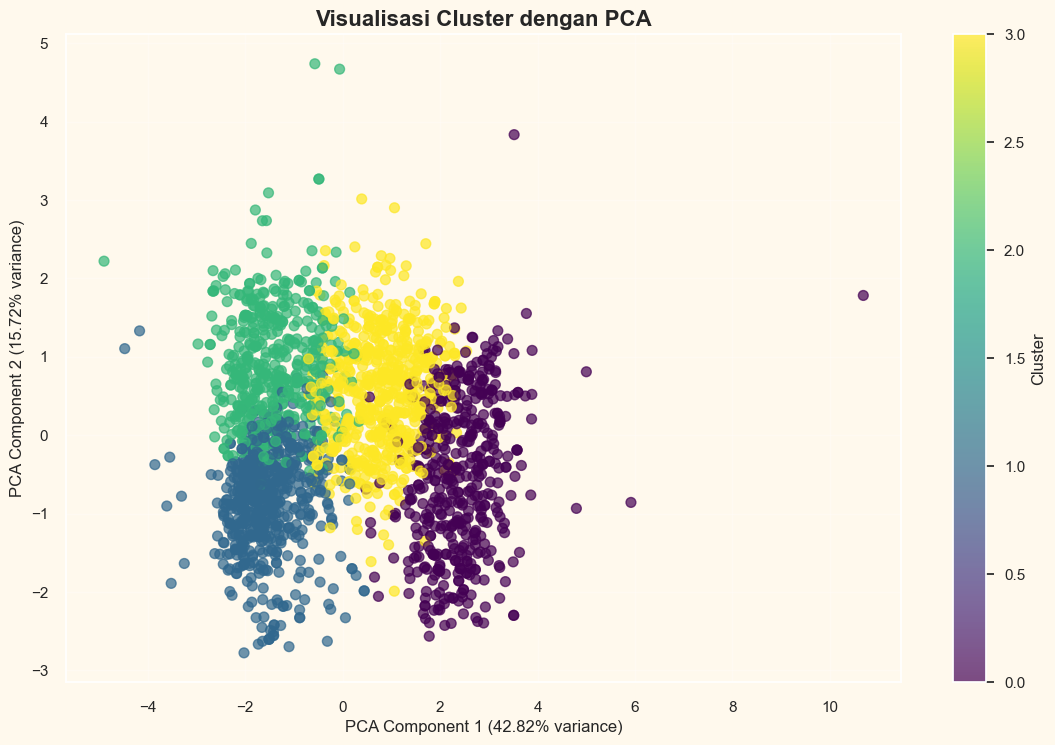

In [ ]:
# PCA for visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], 
                    cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Visualisasi Cluster dengan PCA', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()


<Figure size 1500x1200 with 0 Axes>

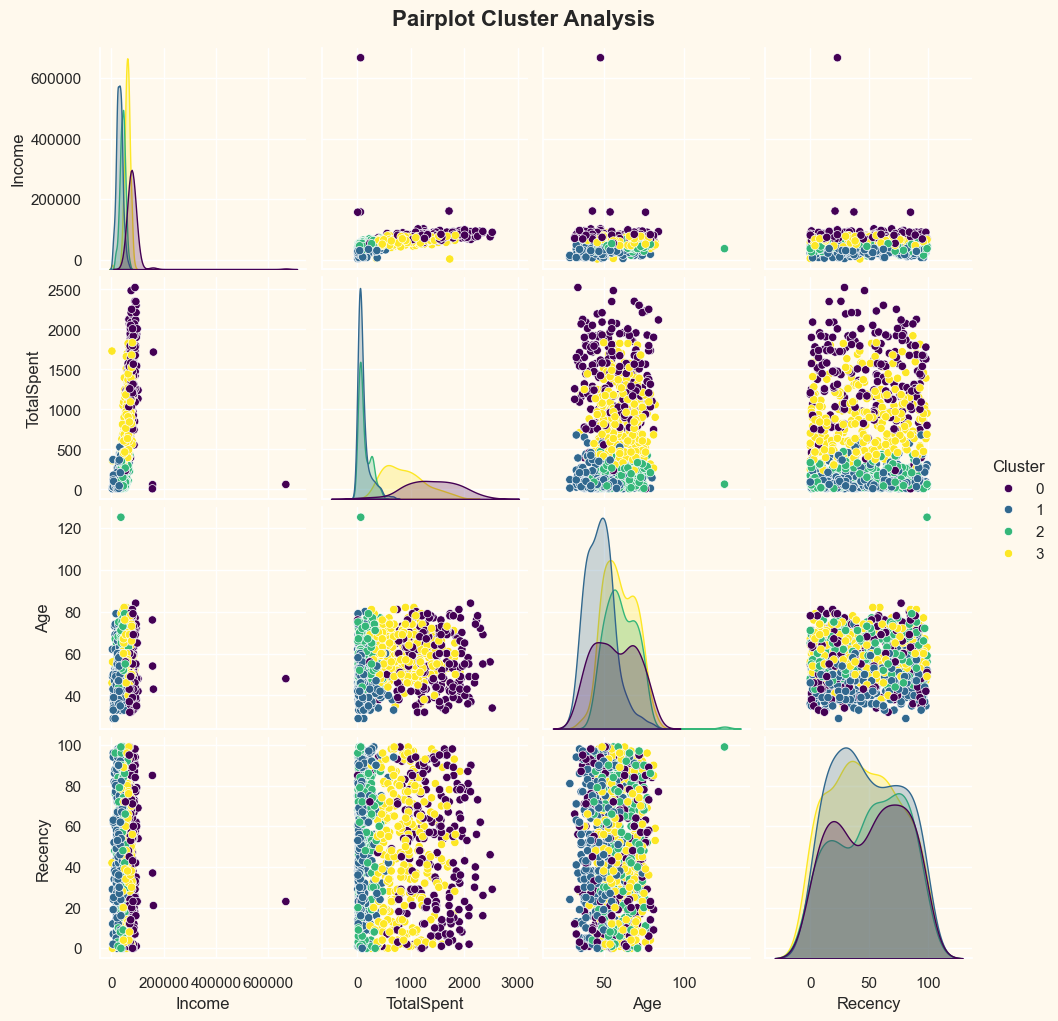

In [ ]:
# 10.2 Pairplot untuk beberapa cluster
sample_df = df.sample(min(1000, len(df)), random_state=42)  # Sample untuk menghindari overplotting

plt.figure(figsize=(15, 12))
sns.pairplot(sample_df, vars=['Income', 'TotalSpent', 'Age', 'Recency'], 
             hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot Cluster Analysis', y=1.02, fontsize=16, fontweight='bold')
plt.show()

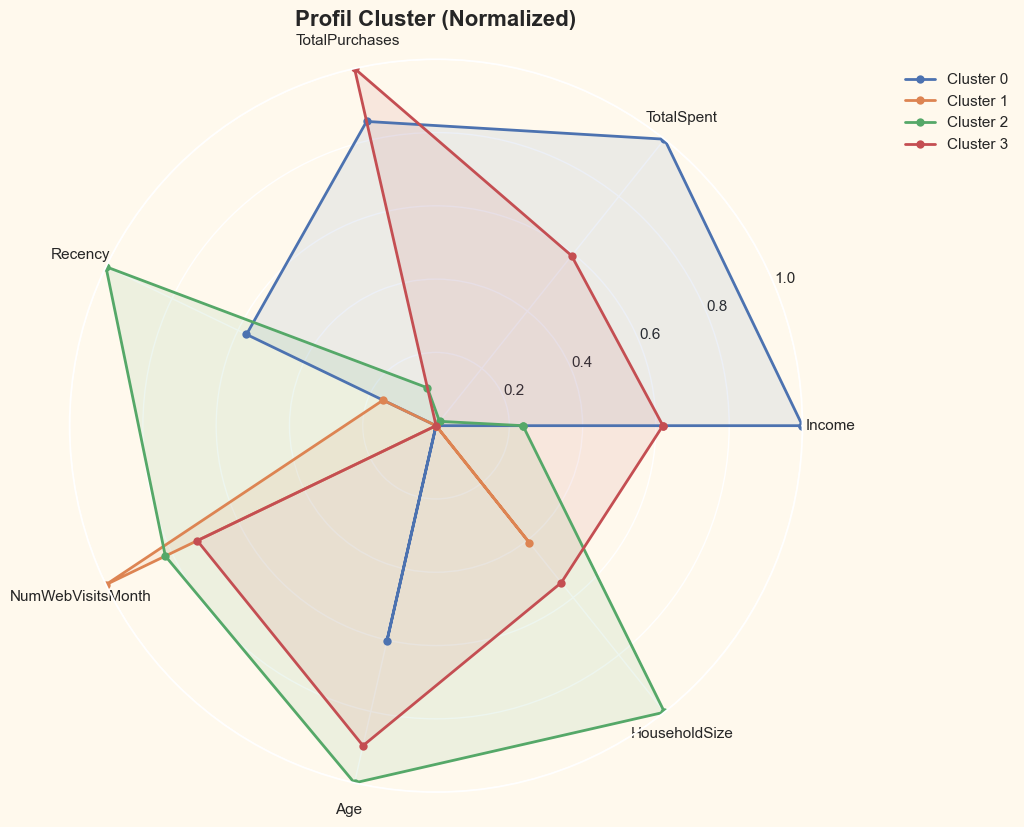

In [ ]:
# Chart radar for Cluster profile (simplified)
def plot_cluster_radar(cluster_profile, features):
    """Plot radar chart untuk profil cluster"""
    # Normalisasi data untuk radar chart
    normalized_profile = (cluster_profile - cluster_profile.min()) / (cluster_profile.max() - cluster_profile.min())
    
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    for cluster in normalized_profile.index:
        values = normalized_profile.loc[cluster].tolist()
        values += values[:1]  # Complete the circle
        ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    ax.set_ylim(0, 1)
    plt.title('Profil Cluster (Normalized)', fontsize=16, fontweight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.tight_layout()
    plt.show()

plot_cluster_radar(cluster_profile, clustering_features)

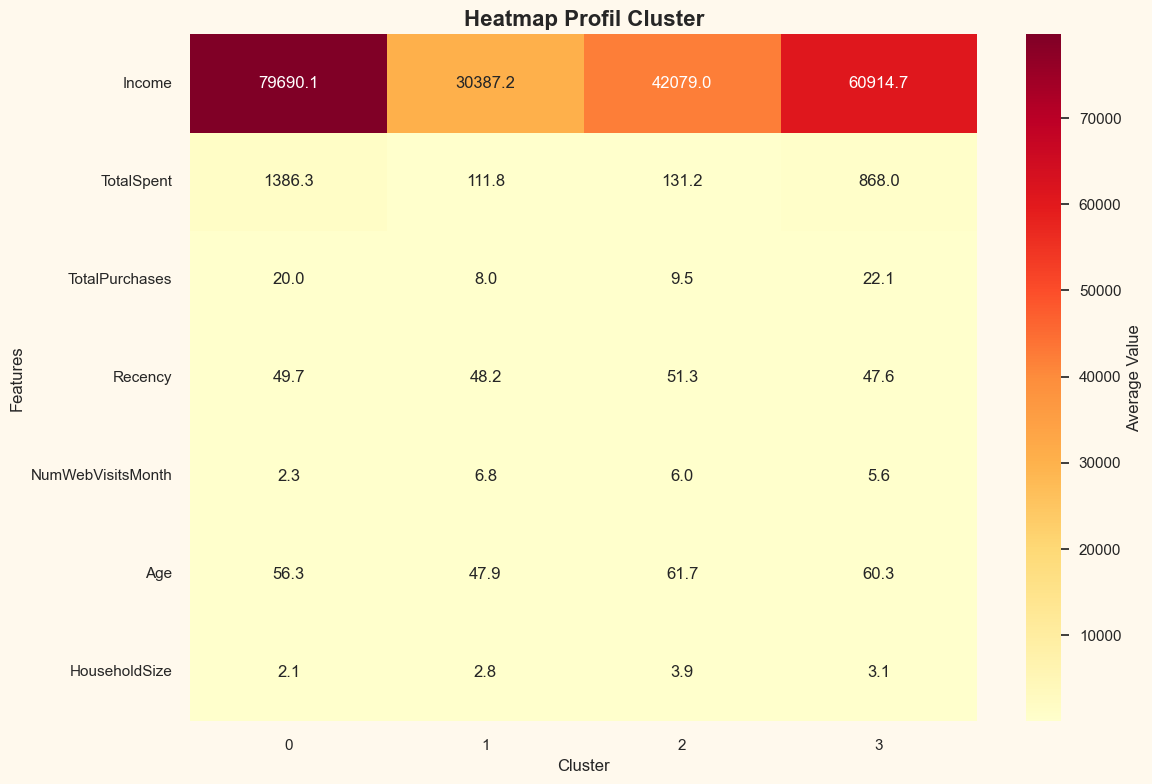

In [ ]:
# 10.4 Heatmap Profil Cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profile.T, annot=True, cmap='YlOrRd', fmt='.1f',
            cbar_kws={'label': 'Average Value'})
plt.title('Heatmap Profil Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# 11. INTERPRETASI CLUSTER & REKOMENDASI BISNIS
print("\nCLUSTER INTERPRETATION & BUSINESS RECOMMENDATIONS")

cluster_name = {}
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]

    avg_income = cluster_data['Income'].mean()
    avg_spending = cluster_data['TotalSpent'].mean()
    avg_recency = cluster_data['Recency'].mean()
    response_rate = cluster_data['CampaignResponse'].mean()

    # pick up cluster type and analyze income on clustering
    if avg_spending > df['TotalSpent'].mean() and avg_income > df['Income'].mean():
        cluster_name[cluster] = "High-Value Loyalists"
    elif avg_spending < df['TotalSpent'].mean() and avg_income < df['Income'].mean():
        cluster_name[cluster] = "Budget Shoppers"


CLUSTER INTERPRETATION & BUSINESS RECOMMENDATIONS
